In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [12]:
iris = datasets.load_iris()
samples = iris.data

In [13]:
# 3개의 그룹으로 나누는 K-Means 모델을 생성함
model = KMeans(n_clusters = 3) # k를 지정해 주어야 함

# .fit 메서드를 통해 K-Means 클러스터링을 수행함
model.fit(samples)

# K-Means를 수행한 다음, .predict 메서드를 통해 unlabeled 데이터를 그룹에 할당함
labels = model.predict(samples)

c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


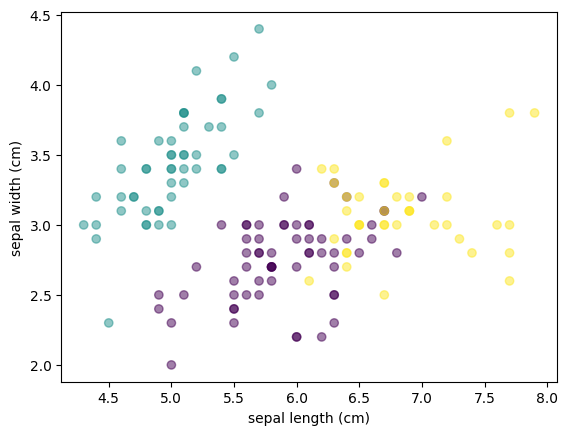

In [14]:
# 결과 시각화
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c = labels, alpha = 0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [15]:
# evaluation : iris 데이터를 3가지 서로 다른 그룹으로 클러스터링 하는 것을 python과 sklearn을 활용하여 구현함
# 실제로 얼마나 많은 데이터를 올바르게 분류한 것일지 확인하기
# iris 데이터셋은 label이 포함되어 있으며, target이라는 내장 속성을 통해 접근 가능함

import numpy as np

target = iris.target

species = np.chararray(target.shape, itemsize = 150)
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = 'setosa'
    elif target[i] == 1:
        species[i] = 'versicolor'
    elif target[i] == 2:
        species[i] = 'virginica'


In [16]:
# cross-tabulation을 통해 결과를 분석함
import pandas as pd

# labels : 비지도 학습 데이터
# species : 원 데이터
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species']) # 빈도표를 만들어주는 pandas 함수
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


In [17]:
num_clusters = list(range(1, 9))
inertias = []

In [18]:
# 각 k 별로 모델을 생성해서 inertia를 측정함
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\soyeon\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

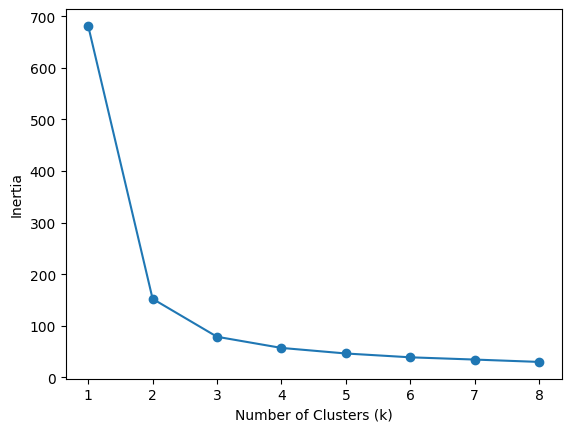

In [19]:
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()